In [2]:
#a differenza uso mapa 2D (approccio semre gaussiana)
#teoria piu difficile ma concetto rimane uguale

import numpy as np
import matplotlib.pyplot as plt

import camb
import healpy as hp

In [4]:
#heaplix lavora per gestire appe (cioe dati sul piano del cielo)
#ha una certa definizione di pixel
#lo fa a varie risoluzioni (diverse scale angolari)-->nside

n_side = 256
hp.nside2npix(n_side) #cosi ottengo al risoluione (per es 786432 pixel)

786432

In [5]:
hp.nside2pixarea(n_side, degrees=True) #area di un pixel in termini di gradi

0.052455852825697924

In [14]:
hp.ang2pix(n_side, theta=np.pi/2, phi=0.) #mi dice in quale pixel si trova la posizione theta, phi

391680

In [11]:
hp_map = np.arange(hp.nside2npix(n_side)) #creo un array di pixel

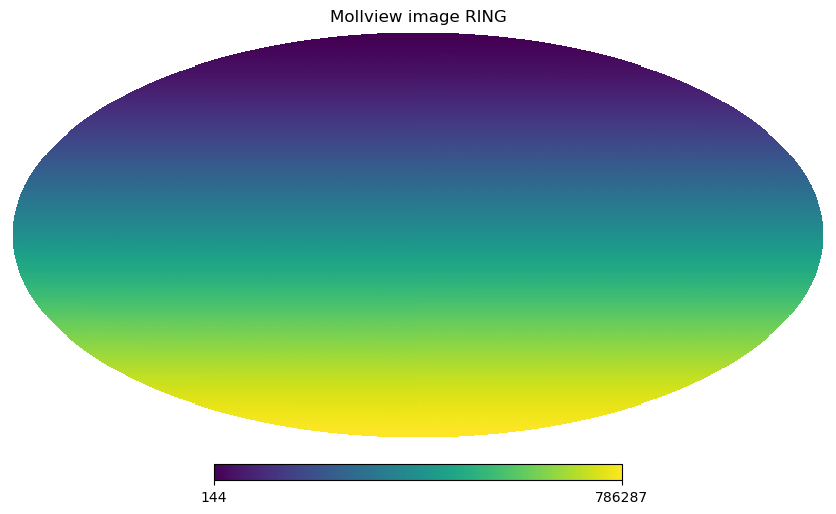

In [12]:
hp.mollview(hp_map, title='Mollview image RING') #mollview e una proiezione del cielo
#ogni quadrato della sfera è un pixel della sfera

In [15]:
#generare un segnale di cmb (un mock)
Omega_b = 0.05
Omega_c = 0.25

h=0.7
As = 2.1e-9
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1e-09
 At = 1.0
 

In [16]:
result = camb.get_results(pars)

In [17]:
power = result.get_cmb_power_spectra(pars, CMB_unit='muK')

In [18]:
power.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [19]:
c_l = power['unlensed_scalar']
c_l.shape
#2401 sono il numero di multipoli (i numeri di l)

(2401, 4)

Text(0, 0.5, '$C_\\ell$')

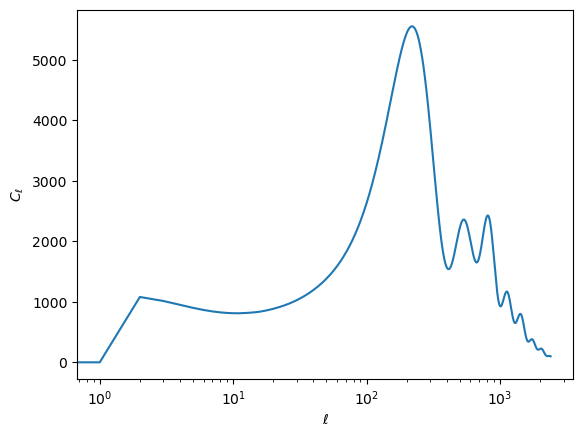

In [22]:
c_l = power['unlensed_scalar'][:,0]

ells = np.arange(len(c_l))

plt.semilogx(ells, c_l)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')


Text(0, 0.5, '$C_\\ell$')

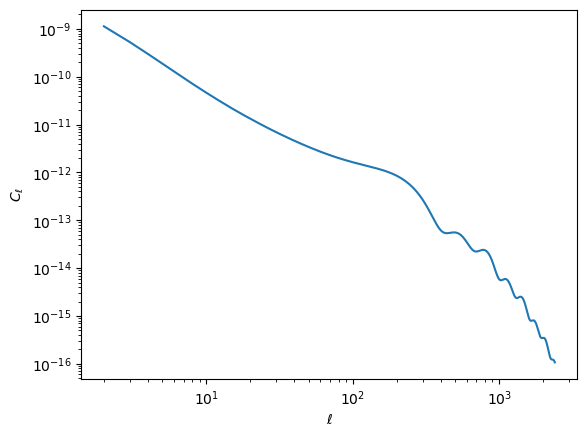

In [29]:
#genero la mappa di temperatura in kelvin

power = result.get_cmb_power_spectra(pars, CMB_unit='K', raw_cl=True)

c_l = power['unlensed_scalar'][:,0]
plt.loglog(ells[2:], c_l[2:])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

In [30]:
alms = hp.synalm(c_l)

In [31]:
alms.shape #per ogni l ho 2l+1 valori di m

(2883601,)

Text(0, 0.5, '$C_\\ell$')

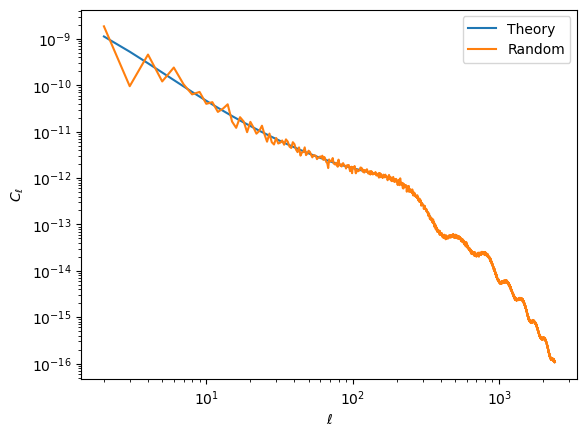

In [35]:
plt.loglog(ells[2:], c_l[2:], label = "Theory")
plt.loglog(ells[2:], hp.alm2cl(alms)[2:], label = "Random")
plt.legend(loc='upper right')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

In [60]:
#ora vogliola mappa
mock_map = hp.alm2map(alms, 2048)
mock_map.shape

(50331648,)

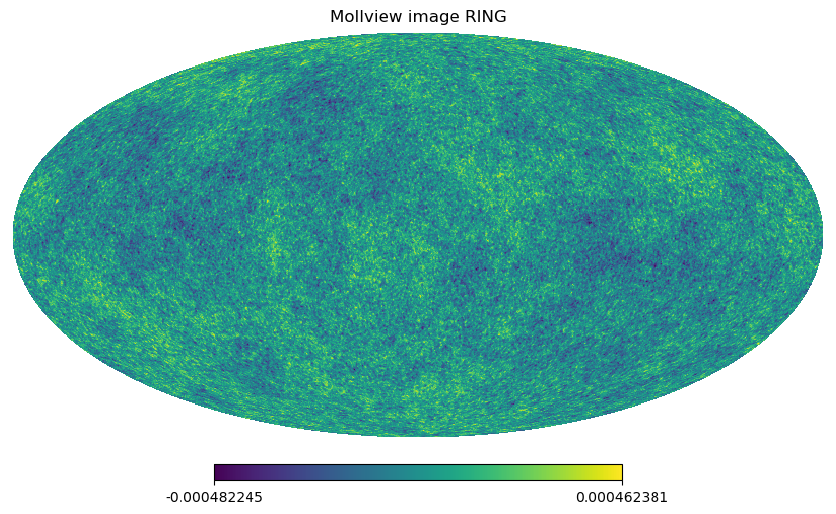

In [61]:
hp.nside2pixarea(256, degrees=True)
hp.mollview(mock_map, title='Mollview image RING')

In [62]:
cl_meas = hp.anafast(mock_map, lmax=2048)
cl_meas.shape

(1025,)

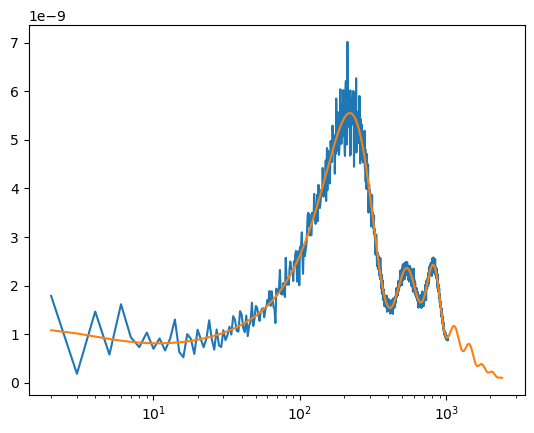

In [64]:
ell_measured = np.arange(len(cl_meas))
plt.semilogx(ell_measured[2:], cl_meas[2:]*ell_measured[2:]*(ell_measured[2:]+1)/(2*np.pi), label='Data')
plt.semilogx(ells[2:], c_l[2:]*ells[2:]*(ells[2:]+1)/(2*np.pi), label='Theory')

In [65]:
#prox lezione vediamo ordini perturbativi piu alti (caso non lineare)-->
#-->cosi ottengo casi piu realistici